# Machine Learning Algorithms Comparison

## Data Exploration

1. Using the Diabetes dataset only for this example
2. Describing the dataset
3. Handling the prediction column
4. Normal Distribution

In [37]:
#import principal libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#load adult dataset
url = "https://raw.githubusercontent.com/MateLabs/Public-Datasets/master/Datasets/diabetes.csv"
breast_df = pd.read_csv(url)
names = ["times_pregnant", "glucose_concentration", "blood_pressure", "skin_fold", "serum_insulin", "body_mass",
        "diabetes_pedigree", "age", "class"]
breast_df.columns = names
breast_df.head()

,times_pregnant,glucose_concentration,blood_pressure,skin_fold,serum_insulin,body_mass,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive
3,1,89,66,23,94,28.1,0.167,21,negative
4,0,137,40,35,168,43.1,2.288,33,positive


In [21]:
#changing class column into 0 and 1
breast_df['class'][breast_df['class'] == 'positive'] = 1
breast_df['class'][breast_df['class'] == 'negative'] = 0
breast_df.head()

/anaconda3/envs/ml_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/ml_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,times_pregnant,glucose_concentration,blood_pressure,skin_fold,serum_insulin,body_mass,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
print("Size: {}".format(breast_df.shape))
print(breast_df.describe())

Size: (768, 9)
       times_pregnant  glucose_concentration  blood_pressure   skin_fold  \
count      768.000000             768.000000      768.000000  768.000000   
mean         3.845052             120.894531       69.105469   20.536458   
std          3.369578              31.972618       19.355807   15.952218   
min          0.000000               0.000000        0.000000    0.000000   
25%          1.000000              99.000000       62.000000    0.000000   
50%          3.000000             117.000000       72.000000   23.000000   
75%          6.000000             140.250000       80.000000   32.000000   
max         17.000000             199.000000      122.000000   99.000000   

       serum_insulin   body_mass  diabetes_pedigree         age  
count     768.000000  768.000000         768.000000  768.000000  
mean       79.799479   31.992578           0.471876   33.240885  
std       115.244002    7.884160           0.331329   11.760232  
min         0.000000    0.000000    

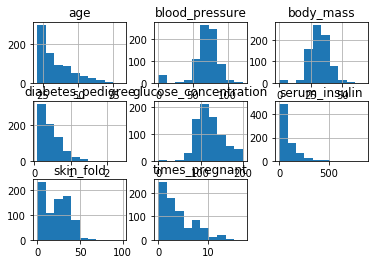

In [25]:
breast_df.hist()
plt.show()

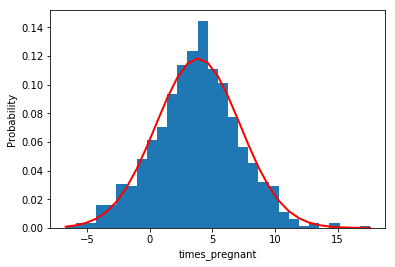

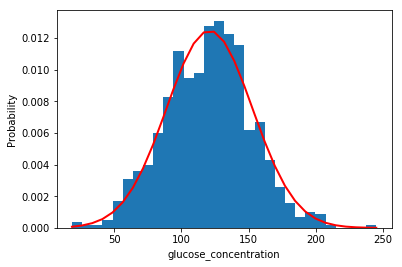

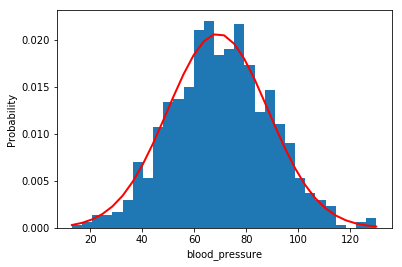

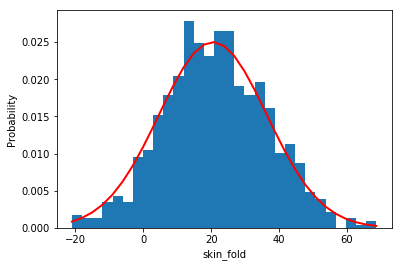

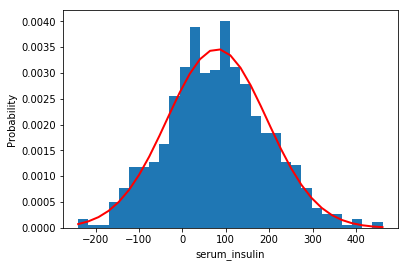

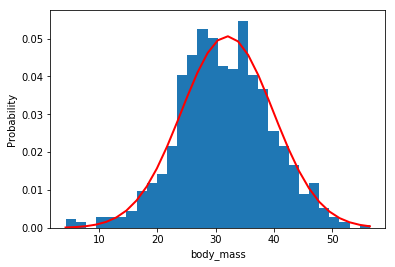

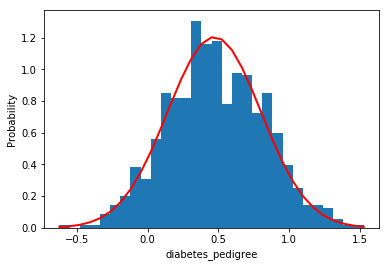

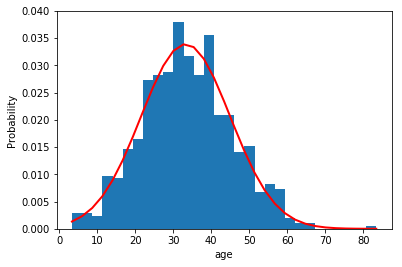

In [44]:
#A Normal Distribution of every column of our dataset without last column
breast_norm = breast_df.iloc[:, 0:8]
for column in breast_norm.columns:
    mu, sigma = breast_norm[column].mean(), breast_norm[column].std()
    s = np.random.normal(mu, sigma, breast_norm[column].count())
    count, bins, ignored = plt.hist(s, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * 
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
             linewidth=2, color='r')
    plt.xlabel(breast_norm[column].name)
    plt.ylabel("Probability")
    plt.show()

## The Machine Learning Models
1. Divide the dataset into X and y
2. Split X and y into the training and the test set
3. Scaling the features
4. Build the list of models to use
5. Evaluate each model
6. Compare algorithms
7. Making predictions
8. Evaluate the predictions

In [90]:
#Divide the dataset into X and y
X = breast_df.iloc[:,0:8]
y = breast_df.iloc[:,8]
y = y.astype('int')

#Split into train and test set using sklearn model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
seed = 7
scoring = 'accuracy'

#importing ml and evaluation libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [92]:
#Building the list of model
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [93]:
# evaluate estimator performance
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.780037 (0.061129)
LDA: 0.773559 (0.058283)
KNN: 0.713432 (0.067707)
CART: 0.674273 (0.063130)
NB: 0.750820 (0.050575)
SVM: 0.750925 (0.063180)


In [94]:
#Making predictions
cls = LogisticRegression(random_state=7)
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7857142857142857
[[89  8]
 [25 32]]
             precision    recall  f1-score   support

          0       0.78      0.92      0.84        97
          1       0.80      0.56      0.66        57

avg / total       0.79      0.79      0.78       154

